<a href="https://colab.research.google.com/github/Nov05/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/DS_Unit_1_Sprint_Challenge_2_Data_Wrangling_and_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# modified by nov05 on 2019-06-07

In [0]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import seaborn as sns
import altair as alt
import plotly

from google.colab import files

%matplotlib inline
# pd.options.display.max_columns = 500
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# import warnings
# warnings.filterwarnings('ignore')
# warnings.filterwarnings(action='once')

In [3]:
print("Pandas version:", pd.__version__)
print("Seaborn version:", sns.__version__, "(better>=0.9.0)")

Pandas version: 0.24.2
Seaborn version: 0.9.0 (better>=0.9.0)


# Data Science Unit 1 Sprint Challenge 2

## Data Wrangling and Storytelling

Taming data from its raw form into informative insights and stories.

## Data Wrangling

In this Sprint Challenge you will first "wrangle" some data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the first part of this sprint challenge.
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

### Part 0. Load data

You don't need to add or change anything here. Just run this cell and it loads the data for you, into three dataframes.

In [0]:
# import pandas as pd

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

In [5]:
datasets = [cell_phones, population, geo_country_codes]
def print_columns(datasets):
  for d in datasets:
    name =[x for x in globals() if globals()[x] is d][0]
    print(name, d.shape)
    print(d.columns.tolist())
print_columns(datasets)

cell_phones (9215, 3)
['geo', 'time', 'cell_phones_total']
population (59297, 3)
['geo', 'time', 'population_total']
geo_country_codes (273, 33)
['geo', 'alt_5', 'alternative_1', 'alternative_2', 'alternative_3', 'alternative_4_cdiac', 'arb1', 'arb2', 'arb3', 'arb4', 'arb5', 'arb6', 'g77_and_oecd_countries', 'gapminder_list', 'god_id', 'gwid', 'income_groups', 'is--country', 'iso3166_1_alpha2', 'iso3166_1_alpha3', 'iso3166_1_numeric', 'iso3166_2', 'landlocked', 'latitude', 'longitude', 'main_religion_2008', 'country', 'pandg', 'un_state', 'unicode_region_subtag', 'upper_case_name', 'world_4region', 'world_6region']


In [6]:
for dataset in datasets:
  print(dataset.isna().sum())
  print()

geo                  0
time                 0
cell_phones_total    0
dtype: int64

geo                 0
time                0
population_total    0
dtype: int64

geo                         0
alt_5                     253
alternative_1             199
alternative_2             232
alternative_3             247
alternative_4_cdiac        58
arb1                      250
arb2                      264
arb3                      268
arb4                      270
arb5                      271
arb6                      271
g77_and_oecd_countries     14
gapminder_list             13
god_id                      2
gwid                       12
income_groups              59
is--country                 0
iso3166_1_alpha2           27
iso3166_1_alpha3           26
iso3166_1_numeric          26
iso3166_2                 272
landlocked                 18
latitude                   32
longitude                  32
main_religion_2008         57
country                     0
pandg                     1

### Part 1. Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

***Optional bonus for Part 1: Take initiative to join more data.***

In [7]:
print_columns(datasets)

cell_phones (9215, 3)
['geo', 'time', 'cell_phones_total']
population (59297, 3)
['geo', 'time', 'population_total']
geo_country_codes (273, 33)
['geo', 'alt_5', 'alternative_1', 'alternative_2', 'alternative_3', 'alternative_4_cdiac', 'arb1', 'arb2', 'arb3', 'arb4', 'arb5', 'arb6', 'g77_and_oecd_countries', 'gapminder_list', 'god_id', 'gwid', 'income_groups', 'is--country', 'iso3166_1_alpha2', 'iso3166_1_alpha3', 'iso3166_1_numeric', 'iso3166_2', 'landlocked', 'latitude', 'longitude', 'main_religion_2008', 'country', 'pandg', 'un_state', 'unicode_region_subtag', 'upper_case_name', 'world_4region', 'world_6region']


In [8]:
geo_country_codes.head(1)

,geo,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,country,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia


In [9]:
my_data = (cell_phones.merge(population)
           .merge(geo_country_codes[['geo', 'country', 'world_6region']]))
print(my_data.shape)
my_data.head()

(8590, 6)


,geo,time,cell_phones_total,population_total,country,world_6region
0,afg,1960,0.0,8996351,Afghanistan,south_asia
1,afg,1965,0.0,9938414,Afghanistan,south_asia
2,afg,1970,0.0,11126123,Afghanistan,south_asia
3,afg,1975,0.0,12590286,Afghanistan,south_asia
4,afg,1976,0.0,12840299,Afghanistan,south_asia


In [10]:
my_data.isna().sum()

geo                  0
time                 0
cell_phones_total    0
population_total     0
country              0
world_6region        0
dtype: int64

In [11]:
(my_data.rename(index=str, 
                columns={
                    "time": "year",
                    "cell_phones_total": "phones", 
                    "population_total": "population",
                    "world_6region": "region"
                        },
                inplace=True)
)
my_data.head(1)

,geo,year,phones,population,country,region
0,afg,1960,0.0,8996351,Afghanistan,south_asia


### Part 2. Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [12]:
my_data.describe()

,year,phones,population
count,8590.000000,8.590000e+03,8.590000e+03
mean,1994.193481,9.004950e+06,2.983823e+07
std,14.257975,5.573408e+07,1.161284e+08
min,1960.000000,0.000000e+00,4.433000e+03
25%,1983.000000,0.000000e+00,1.456148e+06
50%,1995.000000,6.200000e+03,5.725062e+06
75%,2006.000000,1.697652e+06,1.810581e+07
max,2017.000000,1.474097e+09,1.409517e+09


In [13]:
type(my_data['year'].iloc[1])

numpy.int64

In [14]:
my_data['phones_per_person'] = my_data['phones'] / my_data['population']
(my_data[(my_data['geo']=='USA') 
         & (my_data['year']==2017)]
)

,geo,year,phones,population,country,region,phones_per_person


Modify the `geo` column to make the geo codes uppercase instead of lowercase.

In [15]:
my_data['geo'] = my_data['geo'].str.upper()
my_data['geo'].sample(5)

2725    FSM
321     ATG
858     BIH
1274    CAF
2712    FSM
Name: geo, dtype: object

***Optional bonus for Part 2: Take initiative to make more features.***

In [16]:
my_data['region'] = my_data['region'].str.replace('_', ' ')
my_data['region'] = my_data['region'].str.title()
my_data['region'].sample(5)

3185                     America
4160           East Asia Pacific
3577                  South Asia
3223                     America
7420    Middle East North Africa
Name: region, dtype: object

In [17]:
my_data['person_per_phone'] = my_data['population'] / my_data['phones']
(my_data[(my_data['geo']=='USA') 
         & (my_data['year']==2017)]
)

,geo,year,phones,population,country,region,phones_per_person,person_per_phone
8134,USA,2017,395881000.0,324459463,United States,America,1.220125,0.819588


In [0]:
# remove infinite values
my_data = my_data.replace([np.inf, -np.inf], 0)

In [19]:
(my_data[my_data['person_per_phone']==0]).sample(5)

,geo,year,phones,population,country,region,phones_per_person,person_per_phone
8516,ZMB,1990,0.0,8027253,Zambia,Sub Saharan Africa,0.0,0.0
5713,NGA,1982,0.0,77472907,Nigeria,Sub Saharan Africa,0.0,0.0
5664,NER,1979,0.0,5818506,Niger,Sub Saharan Africa,0.0,0.0
1828,CRI,1985,0.0,2730233,Costa Rica,America,0.0,0.0
6731,SDN,1992,0.0,21701476,Sudan,Sub Saharan Africa,0.0,0.0


### Part 3. Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In [20]:
my_data.describe()

,year,phones,population,phones_per_person,person_per_phone
count,8590.000000,8.590000e+03,8.590000e+03,8590.000000,8.590000e+03
mean,1994.193481,9.004950e+06,2.983823e+07,0.279639,1.146410e+03
std,14.257975,5.573408e+07,1.161284e+08,0.454247,2.240027e+04
min,1960.000000,0.000000e+00,4.433000e+03,0.000000,0.000000e+00
25%,1983.000000,0.000000e+00,1.456148e+06,0.000000,0.000000e+00
50%,1995.000000,6.200000e+03,5.725062e+06,0.001564,8.286625e-01
75%,2006.000000,1.697652e+06,1.810581e+07,0.461149,4.998557e+00
max,2017.000000,1.474097e+09,1.409517e+09,2.490243,1.587631e+06


In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |



In [0]:
# This optional code formats float numbers with comma separators
pd.options.display.float_format = '{:,}'.format

In [22]:
country_phones = (my_data[['country', 'year', 'phones']]
                  .groupby(by=['country', 'year'])
                  .sum()
                  .sort_values(by='phones', 
                               ascending=False)
                  .reset_index()
                 )
country_phones[country_phones['year']==2017].head()

,country,year,phones
0,China,2017,"1,474,097,000.0"
5,India,2017,"1,168,902,277.0"
21,Indonesia,2017,"458,923,202.0"
22,United States,2017,"395,881,000.0"
49,Brazil,2017,"236,488,548.0"


2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

In [23]:
# 2014 was the first year that the USA had more cell phones than people.
(my_data[(my_data['country']=='United States') &
         (my_data['phones']>=my_data['population'])])

,geo,year,phones,population,country,region,phones_per_person,person_per_phone
8131,USA,2014,"355,500,000.0",317718779,United States,America,1.118914031833164,0.8937237102672293
8132,USA,2015,"382,307,000.0",319929162,United States,America,1.1949739048796058,0.8368383576549736
8133,USA,2016,"395,881,000.0",322179605,United States,America,1.228758722948959,0.8138294209623599
8134,USA,2017,"395,881,000.0",324459463,United States,America,1.2201246847283354,0.8195883687269659


***Optional bonus for Part 3: Take initiative to do more exploratory data analysis.***

In [36]:
# In 2017 which countries/regions have more phones than people?
condition = ((my_data['year']==2017) & 
             (my_data['phones_per_person']>=1)
            )
(my_data[condition]['country']
 .unique()
)

array(['Albania', 'Andorra', 'United Arab Emirates', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Belgium',
       'Bulgaria', 'Bahrain', 'Belarus', 'Brazil', 'Barbados', 'Brunei',
       'Botswana', 'Switzerland', 'Chile', 'China', "Cote d'Ivoire",
       'Colombia', 'Cape Verde', 'Costa Rica', 'Czech Republic',
       'Germany', 'Denmark', 'Algeria', 'Egypt', 'Spain', 'Estonia',
       'Finland', 'Fiji', 'France', 'Gabon', 'United Kingdom', 'Georgia',
       'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Hong Kong, China',
       'Croatia', 'Hungary', 'Indonesia', 'Ireland', 'Iran', 'Iceland',
       'Israel', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan',
       'Kyrgyz Republic', 'Cambodia', 'St. Kitts and Nevis',
       'South Korea', 'Kuwait', 'Liechtenstein', 'Sri Lanka', 'Lesotho',
       'Lithuania', 'Luxembourg', 'Latvia', 'Morocco', 'Maldives',
       'Macedonia, FYR', 'Malta', 'Montenegro', 'Mongolia', 'Mauritius',
       'Malaysia', 'Namibia', 'Nicaragua'

### (OPTIONAL) Part 4. Reshape data

*This part is not needed to pass the sprint challenge, only to get a 3! Only work on this after completing the other sections.*

Create a pivot table:
- Columns: Years 2007—2017
- Rows: China, India, United States, Indonesia, Brazil (order doesn't matter)
- Values: Cell Phones Total

The table's shape should be: (5, 11)

Sort these 5 countries, by biggest increase in cell phones from 2007 to 2017.

Which country had 935,282,277 more cell phones in 2017 versus 2007?

If you have the time and curiosity, what other questions can you ask and answer with this data?

## Data Storytelling

In this part of the sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

### Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [0]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

In [39]:
print(df.shape)
df.head()

(2693, 6)


,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"


### Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:
You can make a crosstab. (See pandas documentation for examples, explanation, and parameters.)

You'll know you've calculated correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

**Optional Bonus Challenge:** Do additional insightful data exploration.

In [62]:
ct = pd.crosstab(df['Year'], df['Occupation'], normalize='index')
ct.head()

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other
Year,,,,
1999,0.9036144578313253,0.012048192771084338,0.06626506024096386,0.018072289156626505
2000,0.7396449704142012,0.08284023668639054,0.1242603550295858,0.05325443786982249
2001,0.7261146496815286,0.03821656050955414,0.19745222929936307,0.03821656050955414
2002,0.6226415094339622,0.06918238993710692,0.2641509433962264,0.0440251572327044
2003,0.5602409638554217,0.10240963855421686,0.2469879518072289,0.09036144578313253


In [59]:
# the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015
ct.loc[[1999, 2015]]

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other
Year,,,,
1999,0.9036144578313253,0.012048192771084338,0.06626506024096386,0.018072289156626505
2015,0.45,0.17,0.24,0.14


In [69]:
grp = df[['Year', 'Occupation', 'Guest']].groupby(by=['Year', 'Occupation']).count()
grp.head(8)

Guest
Year Occupation                    
1999 Acting, Comedy & Music     150
     Government and Politics      2
     Media                       11
     Other                        3
2000 Acting, Comedy & Music     125
     Government and Politics     14
     Media                       21
     Other                        9

### Part 2 — Recreate this explanatory visualization:

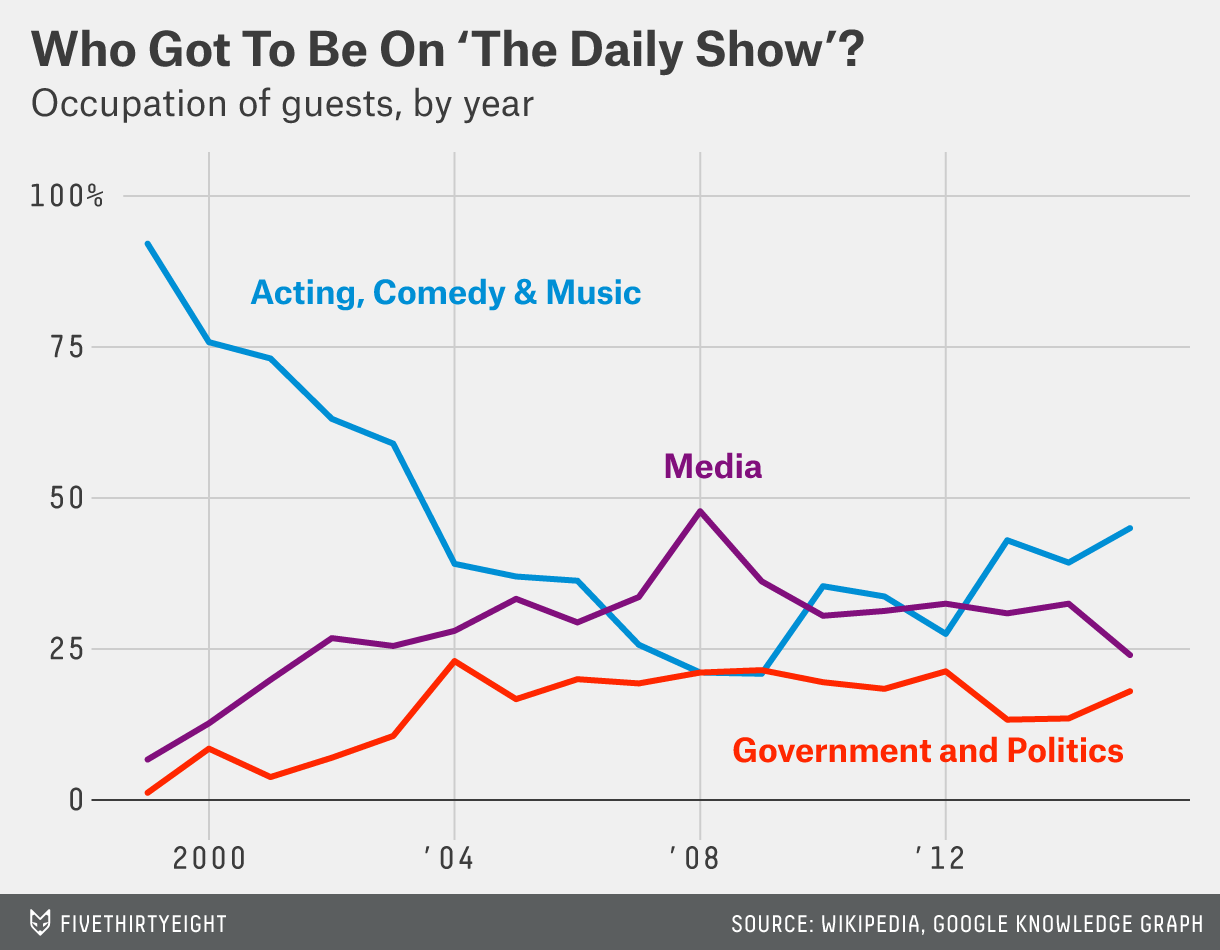

In [70]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(png, width=500)
display(example)

**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.
- If you choose to use seaborn, you may want to upgrade the version to 0.9.0.

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend or labels for the lines. (But you don't need each label positioned next to its line or colored like 538.)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

**Optional Bonus Challenge:**
- Give your plot polished aesthetics, with improved resemblance to the 538 example.
- Any visual element not specifically mentioned in the expectations is an optional bonus.

In [92]:
df1 = ct * 100
df1 = df1.reset_index()
df1.head()

Occupation,Year,"Acting, Comedy & Music",Government and Politics,Media,Other
0,1999,90.36144578313254,1.2048192771084338,6.626506024096386,1.8072289156626504
1,2000,73.96449704142012,8.284023668639055,12.42603550295858,5.325443786982249
2,2001,72.61146496815286,3.821656050955414,19.745222929936308,3.821656050955414
3,2002,62.264150943396224,6.918238993710692,26.41509433962264,4.40251572327044
4,2003,56.024096385542165,10.240963855421686,24.69879518072289,9.036144578313253


In [93]:
df1['Year'] = pd.to_datetime(df1['Year'], format='%Y')
df1.sample()

Occupation,Year,"Acting, Comedy & Music",Government and Politics,Media,Other
10,2009-01-01,20.858895705521473,20.858895705521473,36.19631901840491,22.085889570552148


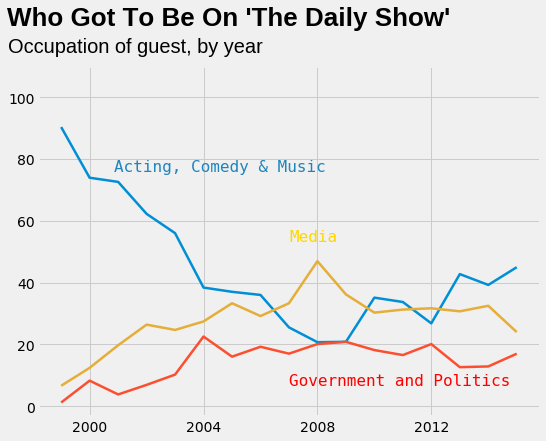

In [116]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(8, 6))
ax = fig.subplots(1, 1)

for o in ['Acting, Comedy & Music',
          'Government and Politics',
          'Media']:
  ax.plot_date(x=df1['Year'], 
               y=df1[o],
               linestyle='-', 
               linewidth=2.5,
               marker=None);

plt.title(label="Who Got To Be On 'The Daily Show'",
          x=0.38, y=1.1,
          fontname='Liberation Sans',
          fontsize=26, fontweight='bold')
plt.text(x=-0.06, y=1.04, transform=ax.transAxes,
         s="Occupation of guest, by year",
         fontname='Liberation Sans',
         fontsize=20)  

plt.text(x=0.15, y=0.7, transform=ax.transAxes,
         s="Acting, Comedy & Music",
         fontname='DejaVu Sans Mono', 
         fontsize=16,
         color="#1E85BD")
plt.text(x=0.5, y=0.09, transform=ax.transAxes,
         s="Government and Politics",
         fontname='DejaVu Sans Mono',
         fontsize=16,
         color='red')
plt.text(x=0.5, y=0.5, transform=ax.transAxes,
         s="Media",
         fontname='DejaVu Sans Mono',
         fontsize=16,
         color='gold')

ax.xaxis.set_major_locator(matplotlib.dates.YearLocator(base=4))
ax.set_ylim(top=110);

### (OPTIONAL) Part 3 — Who were the top 10 guests on _The Daily Show_?

*This part is not needed to pass the sprint challenge, only to get a 3! Only work on this after completing the other sections.*

**Make a plot** that shows their names and number of appearances.

**Add a title** of your choice.

**Expectations:** It's ok to make a simple, quick plot: exploratory, instead of explanatory. 

**Optional Bonus Challenge:** You can change aesthetics and add more annotation. For example, in a relevant location, could you add the text "19" to show that Fareed Zakaria appeared 19 times on _The Daily Show_? (And so on, for each of the top 10 guests.)

In [109]:
df.head(2)

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"


In [112]:
df2 = df['Guest'].value_counts().head(10)
df2

Fareed Zakaria    19
Denis Leary       17
Brian Williams    16
Paul Rudd         13
Ricky Gervais     13
Tom Brokaw        12
Bill O'Reilly     10
Richard Lewis     10
Reza Aslan        10
Will Ferrell      10
Name: Guest, dtype: int64

19

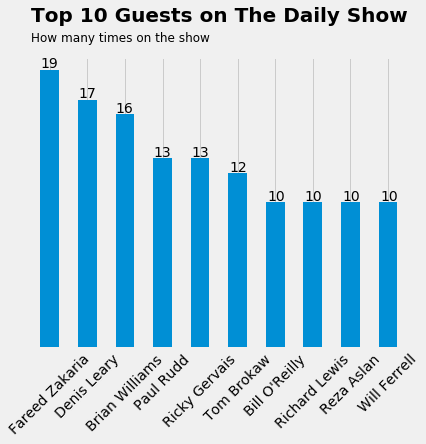

In [170]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(6, 5))
ax = fig.subplots(1, 1)

plt.tick_params(
    axis='y',          # changes apply to the y-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ax.set_yticks([])

df2.plot.bar(rot=45,
             ax=ax);

plt.title(label="Top 10 Guests on The Daily Show",
          x=0.5, y=1.1, 
          fontsize=20, fontweight='bold');
plt.text(s="How many times on the show",
         x=-0.5, y=21, 
         fontsize=12)

for p in ax.patches:
    ax.annotate(str(p.get_height()), 
                (p.get_x() * 1.005, 
                 p.get_height() * 1.01))